## Imports

In [12]:
import pandas as pd
import numpy as np
from psaw import PushshiftAPI
import datetime 
from bs4 import BeautifulSoup 
import requests
import re
import time
from sklearn import svm, datasets
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Enter City (Emphasis on city) where natural disaster occured

In [13]:
searchcity = 'trinity'

## Creates a list of URLS to search through

In [14]:
url_list=[]
for page in range(1,6000):
    url_list.append("https://api.adzuna.com:443/v1/api/jobs/us/search/"+ str(page) +"?app_id=d3330ea8&app_key=cbcbe79274381fae5af07fb6828067ce&results_per_page=100&where="+str(searchcity)+"&sort_direction=up&sort_by=date&max_days_old=365")

## Starts pulling data from Adunza API for jobs

In [15]:
spot = 1
pulleddata = []
for url in url_list:
    try: 
        requests.get(url).json()['results'][0]
        pulleddata.append(requests.get(url).json())
        print(str(spot) + '0 job ads pulled')
        spot += 1
        time.sleep(1)
    except: 
        print('This is the end of data')
        break

10 job ads pulled
This is the end of data


## Structures data 

In [16]:
structureddata = []
for x in range(0, len(pulleddata)):
    for y in pulleddata[x]['results']:
        structureddata.append(y)

## Creates Dataframe

In [17]:
df = pd.DataFrame()

for x in range(0, len(structureddata)):
    try:
        df['company'] = [structureddata[x]['company']['display_name'] for x in range(0, len(structureddata))]
        df['date'] = [structureddata[x]['created'][:7] for x in range(0, len(structureddata))]
        df['title']= [structureddata[x]['title']for x in range(0, len(structureddata))]
        df['All_Sectors']= [structureddata[x]['category']['label']for x in range(0, len(structureddata))]

    except:
        print('error')
        pass

try: 
    df.drop_duplicates(inplace=True)
except:
    pass

In [1]:
df.head()

NameError: name 'df' is not defined

## Changing date to datetime data type

In [19]:
try:
    df['date'] = pd.to_datetime(df['date'])
except:
    pass

## Null (all should be 0)

In [20]:
df.isnull().sum()

company        0
date           0
title          0
All_Sectors    0
dtype: int64

## Number of Data Points

In [21]:
len(df)

19

## Frequency of posting by dates

In [22]:
df['date'].value_counts().sort_index()

2018-05-01    1
2018-06-01    1
2018-09-01    2
2018-10-01    3
2018-11-01    2
2018-12-01    5
2019-01-01    5
Name: date, dtype: int64

## Most common Sectors posted

In [23]:
df['All_Sectors'].value_counts()

Unknown                       11
Logistics & Warehouse Jobs     3
Engineering Jobs               1
Travel Jobs                    1
Social work Jobs               1
Healthcare & Nursing Jobs      1
Admin Jobs                     1
Name: All_Sectors, dtype: int64

## Industry Dummyvariable DataFrame

In [24]:
industrygraphs = pd.get_dummies(df['All_Sectors'])
industry = pd.concat([df, industrygraphs], axis=1)
for x in industry.columns[6:]:
    print(x)

Healthcare & Nursing Jobs
Logistics & Warehouse Jobs
Social work Jobs
Travel Jobs
Unknown


## Saves Dataframe (with dummies, to cityname.csv)

In [25]:
industry.to_csv(str(searchcity)+'data.csv')

## Creating of graphing data

In [26]:
daterange = pd.date_range(start="2018-01", end='2019-01', freq='M')
graphme = pd.DataFrame(columns=[x for x in industry.columns[6:]], index= daterange)
graphme

,Healthcare & Nursing Jobs,Logistics & Warehouse Jobs,Social work Jobs,Travel Jobs,Unknown
2018-01-31,NaN,NaN,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN,NaN,NaN
2018-03-31,NaN,NaN,NaN,NaN,NaN
2018-04-30,NaN,NaN,NaN,NaN,NaN
2018-05-31,NaN,NaN,NaN,NaN,NaN
2018-06-30,NaN,NaN,NaN,NaN,NaN
2018-07-31,NaN,NaN,NaN,NaN,NaN
2018-08-31,NaN,NaN,NaN,NaN,NaN
2018-09-30,NaN,NaN,NaN,NaN,NaN
2018-10-31,NaN,NaN,NaN,NaN,NaN


In [27]:
graphme['2018-02']

,Healthcare & Nursing Jobs,Logistics & Warehouse Jobs,Social work Jobs,Travel Jobs,Unknown
2018-02-28,NaN,NaN,NaN,NaN,NaN


In [28]:
graphme.fillna(0, inplace=True)

In [29]:
for x in range(6, (len(industry.columns))):
    for date in industry[industry[str(industry.columns[x])] == 1]['date']:
        for inde in graphme.index:
            if str(date)[0:7] == str(inde)[:7]:
                graphme[str(inde)[0:7]][str(industry.columns[x])]+=1
graphme.to_csv(str(searchcity)+"graphdata.csv")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [30]:
graphme

,Healthcare & Nursing Jobs,Logistics & Warehouse Jobs,Social work Jobs,Travel Jobs,Unknown
2018-01-31,0,0,0,0,0
2018-02-28,0,0,0,0,0
2018-03-31,0,0,0,0,0
2018-04-30,0,0,0,0,0
2018-05-31,0,0,0,0,1
2018-06-30,0,1,0,0,0
2018-07-31,0,0,0,0,0
2018-08-31,0,0,0,0,0
2018-09-30,0,1,0,0,1
2018-10-31,0,0,0,0,3


## Plotly graph

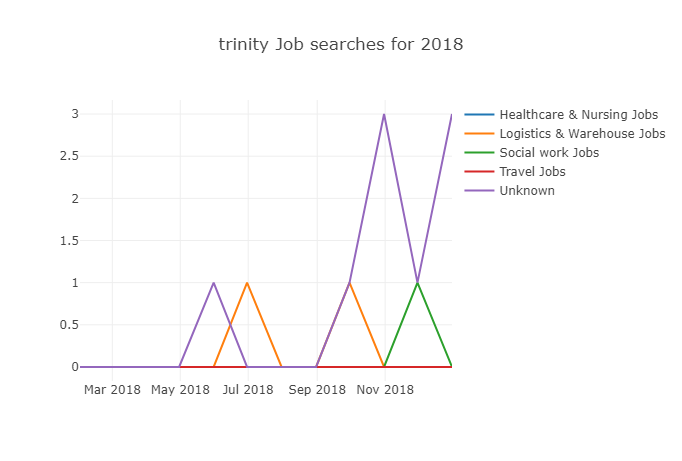

In [31]:
traces = {}
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

for num in range(0, (len(graphme))):
    try:
        traces['trace'+str(num)] = dict(
                    x= graphme.index,
                    y= graphme[graphme.columns[num]],
                    mode='lines',
                    name= graphme.columns[num])
        print(name)
    except:
        pass

data = [traces['trace'+str(x)] for x in range(0, (len(traces)))]

plot({'data':data,
       'layout' : {'title': str(searchcity) +" Job searches for 2018"},
     }, filename=str(searchcity)+"PLOTLY.html")


iplot({'data':data,
       'layout' : {'title': str(searchcity) +" Job searches for 2018"}})

## Matplotlib

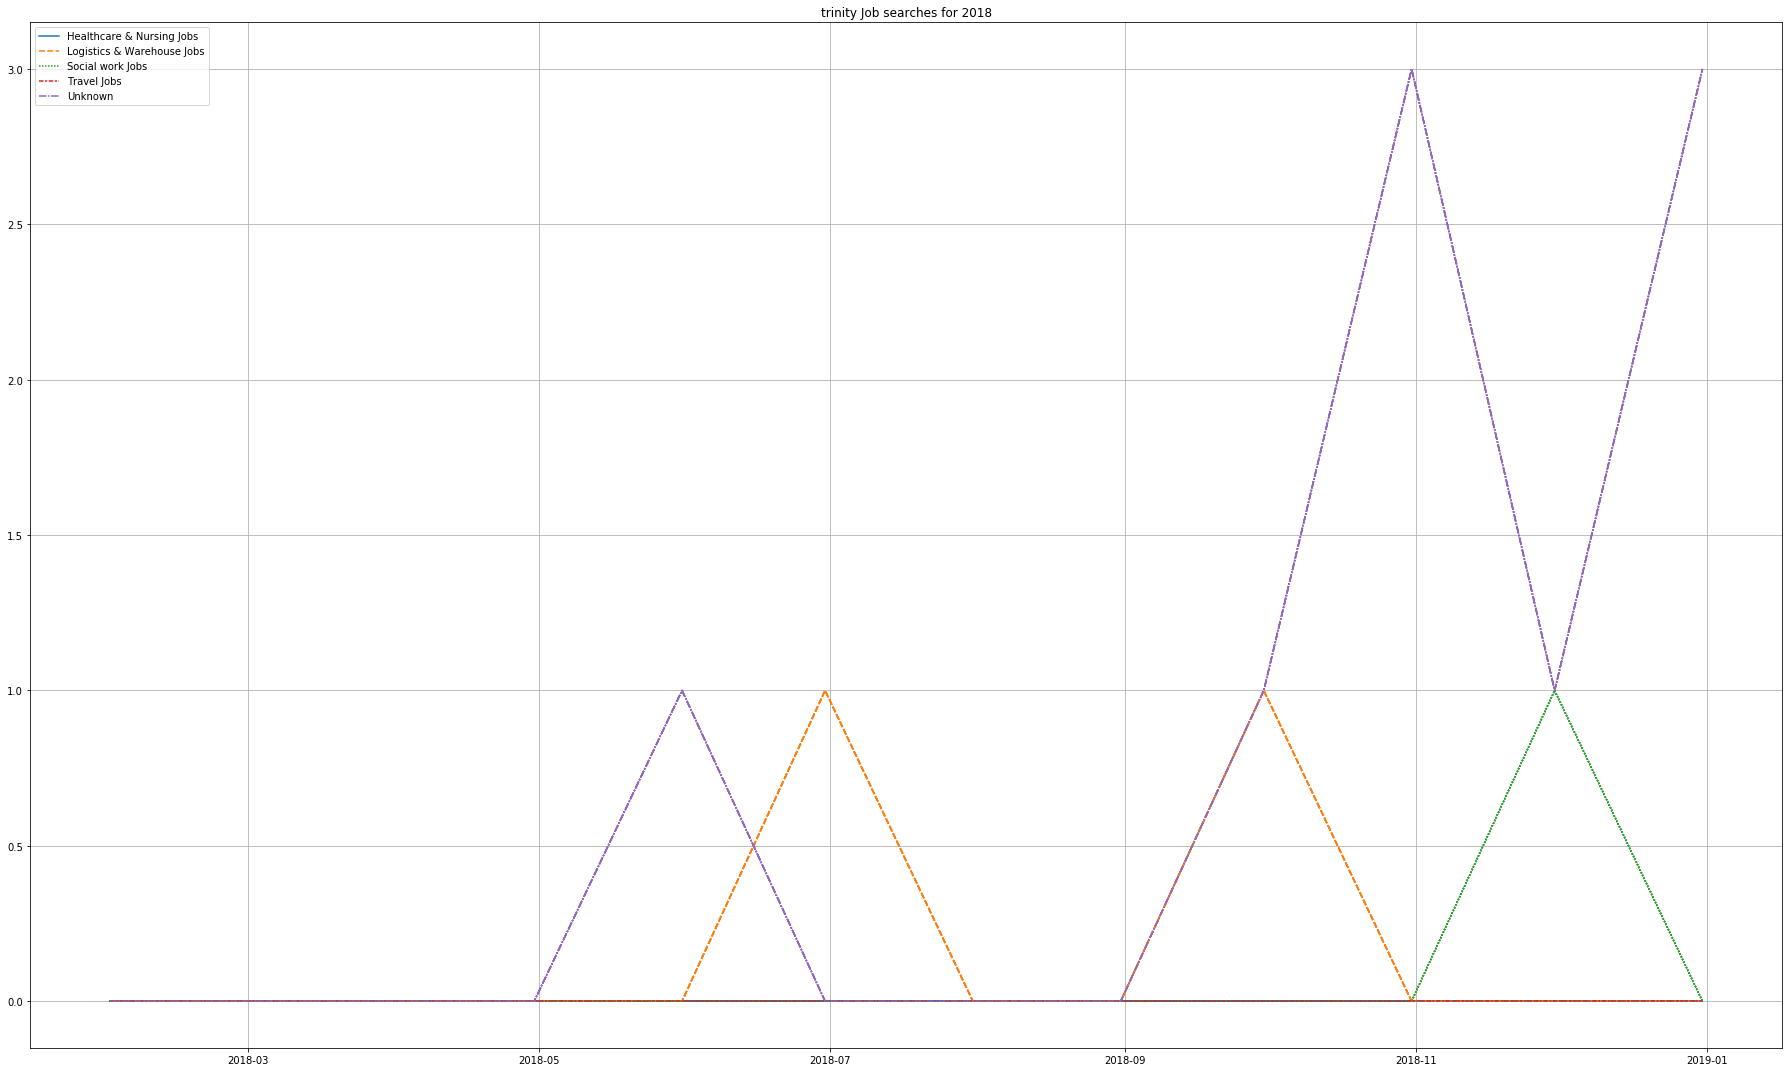

In [32]:
plt.figure(figsize=(25,15))
for num in range(6, len(industry.columns)):
    sns.lineplot(data = graphme)
plt.legend(labels=graphme.columns)
plt.title(str(searchcity) + " Job searches for 2018")
plt.grid()
plt.tight_layout()
plt.savefig(str(searchcity)+"Matplotlib.jpg")